# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [5]:
df.info()

# в некоторых столбцах отсутствуют данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


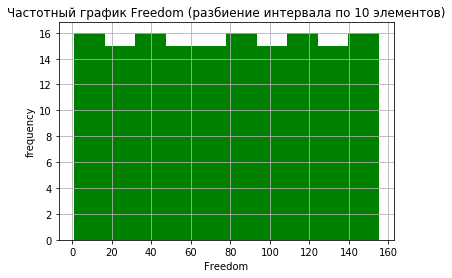

In [6]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

# получается равномерное распределение

Text(0, 0.5, 'frequency')

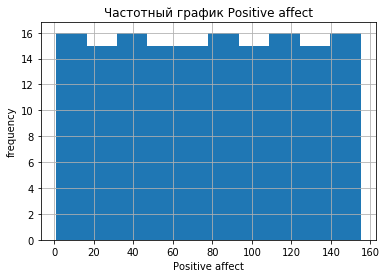

In [7]:
ax = df['Positive affect'].hist(bins=10)
ax.set_title('Частотный график Positive affect')
ax.set_xlabel('Positive affect')
ax.set_ylabel('frequency')

# в данном случае распределение тоже равномерное

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [12]:
freedom = df['Freedom']
# заполним отсутсвующее значение
freedom = freedom.fillna(method='ffill')

In [14]:
print(f'Медиана равна {statistics.median(freedom)}')
print(f'Мода равна {statistics.mode(freedom)}')
print(f'Математическое ожидание равно {round(statistics.mean(freedom),2)}')
print(f'Стандартное отклонение равно {round(statistics.pstdev(freedom),2)}')
print(f'Дисперсия равна {round(statistics.pvariance(freedom),2)}')
print(f'Минимум равен {min(freedom)}')
print(f'Максимум равен {max(freedom)}')
print(f'Размах равен {max(freedom)-min(freedom)}')

Медиана равна 77.5
Мода равна 68.0
Математическое ожидание равно 77.94
Стандартное отклонение равно 44.61
Дисперсия равна 1989.8
Минимум равен 1.0
Максимум равен 155.0
Размах равен 154.0


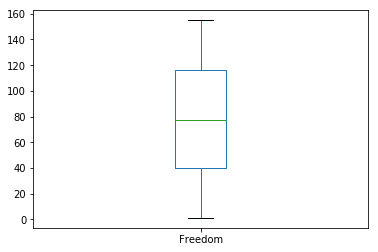

In [15]:
# выбросы (их нет)
freedom.plot(kind='box') 

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

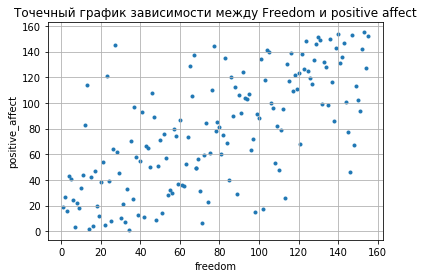

In [19]:
positive_affect = df['Positive affect']
positive_affect = positive_affect.fillna(method='ffill')
plt.xlabel('freedom')
plt.ylabel('positive_affect')
plt.title('Точечный график зависимости между Freedom и positive affect')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [20]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(freedom, positive_affect)
print(f'Коэффициент корреляции Пирсона: {corr}')

#значение коэфициента говорит о довольно сильной положительной линейной зависимости между Freedom и Positive affect

Коэффициент корреляции Пирсона: 0.6816719375536687


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [21]:
# Вычитаем из каждого элемента среднее
freedom_n = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_n))

# масштабируем
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_z = min_max_scaler.fit_transform(np.array(freedom_n).reshape(-1, 1))
print(min(freedom_z))
print(max(freedom_z))

5.101332461867386e-15
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

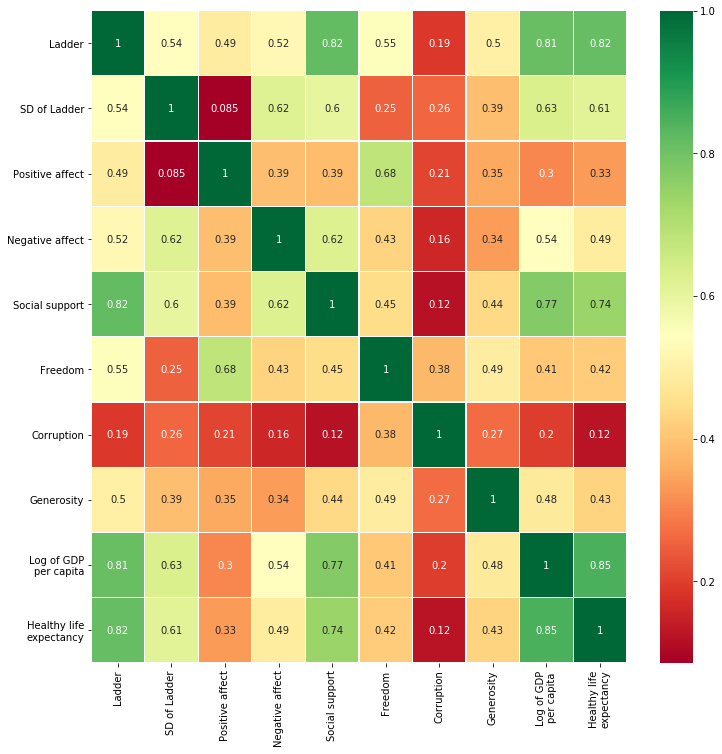

In [22]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [23]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
avocado = pd.read_csv(url)
avocado[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [24]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Сделать частотный график колонки AveragePrice. Какое это распределение?

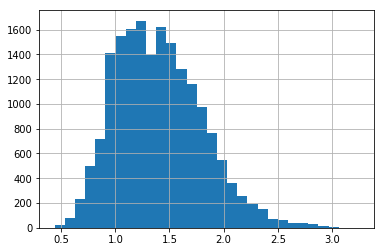

In [28]:
# Это распределение близко к нормальному (немного смещенное)
avocado['AveragePrice'].hist(bins=30)

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

-0.20831704848788477

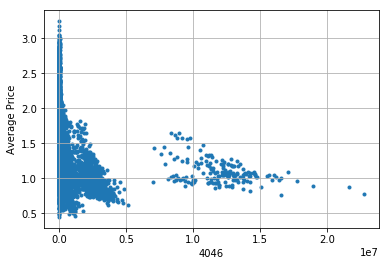

In [29]:
x = avocado['4046']
y = avocado['AveragePrice']

# Посмотрим на корреляцию на графических данных

plt.xlabel('4046')
plt.ylabel('Average Price')
plt.grid(True)
plt.scatter(x, y, marker='.')

# посчитаем коэффициент корреляции
corr, p_value = pearsonr(x, y)
corr

# Видим слабую отрицательную корреляцию